#  Классификация изображений с помощью сверточных нейронных сетей

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Deep Learning with PyTorch (2020) Авторы: Eli Stevens, Luca Antiga, Thomas Viehmann
* https://pytorch.org/docs/stable/nn.html#convolution-layers
* https://pytorch.org/vision/0.16/transforms.html#v2-api-reference-recommended
* https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
* https://pytorch.org/vision/main/generated/torchvision.datasets.ImageFolder.html
* https://kozodoi.me/blog/20210308/compute-image-stats
* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.matshow.html

## Задачи для совместного разбора

1\. Рассмотрите основные возможности по созданию датасетов из `torchvision` и примеры работы основных слоев для создания сверточных нейронных сетей для анализа изображений.

In [ ]:
import torch as th
import torch.nn as nn
import torchvision

In [ ]:
dset = torchvision.datasets.CIFAR10(
    root = './cifar',
    train = True,
    download = True
)

100%|██████████| 170498071/170498071 [00:03<00:00, 53907647.68it/s]


Extracting ./cifar/cifar-10-python.tar.gz to ./cifar


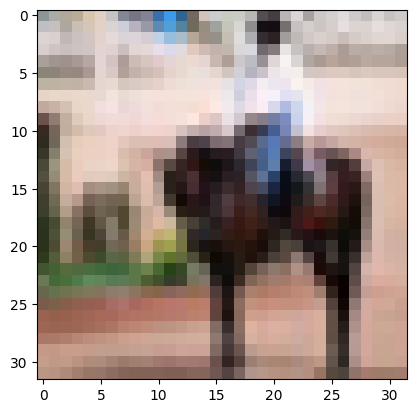

In [ ]:
import matplotlib.pyplot as plt
img, label = dset[11]
plt.imshow(img)
plt.show()

In [ ]:
import torchvision.transforms.v2 as T

In [ ]:
dset = torchvision.datasets.CIFAR10(
    root = './cifar',
    train = True,
    download = True,
    transform = T.Compose(
        [
            T.ToTensor(),
            T.Normalize(mean =(0.5,0.5,0.5), std = (0.5,0.5,0.5))
        ]
    )
)
print(dset[0][0])

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/v2/_deprecated.py:43: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.
  warnings.warn(


Files already downloaded and verified
tensor([[[-0.5373, -0.6627, -0.6078,  ...,  0.2392,  0.1922,  0.1608],
         [-0.8745, -1.0000, -0.8588,  ..., -0.0353, -0.0667, -0.0431],
         [-0.8039, -0.8745, -0.6157,  ..., -0.0745, -0.0588, -0.1451],
         ...,
         [ 0.6314,  0.5765,  0.5529,  ...,  0.2549, -0.5608, -0.5843],
         [ 0.4118,  0.3569,  0.4588,  ...,  0.4431, -0.2392, -0.3490],
         [ 0.3882,  0.3176,  0.4039,  ...,  0.6941,  0.1843, -0.0353]],

        [[-0.5137, -0.6392, -0.6235,  ...,  0.0353, -0.0196, -0.0275],
         [-0.8431, -1.0000, -0.9373,  ..., -0.3098, -0.3490, -0.3176],
         [-0.8118, -0.9451, -0.7882,  ..., -0.3412, -0.3412, -0.4275],
         ...,
         [ 0.3333,  0.2000,  0.2627,  ...,  0.0431, -0.7569, -0.7333],
         [ 0.0902, -0.0353,  0.1294,  ...,  0.1608, -0.5137, -0.5843],
         [ 0.1294,  0.0118,  0.1137,  ...,  0.4431, -0.0745, -0.2784]],

        [[-0.5059, -0.6471, -0.6627,  ..., -0.1529, -0.2000, -0.1922],
       

2\. Реализуйте типовую архитектуру CNN для классификации изображений.

In [ ]:
dset[0][0].shape

torch.Size([3, 32, 32])

In [ ]:
img = dset[0][0]

In [ ]:
conv = nn.Conv2d(in_channels = 3, out_channels = 16, kernel_size = 3)
out = conv(img)
out.shape

torch.Size([16, 30, 30])

In [ ]:
conv2 = nn.Conv2d(in_channels = 16, out_channels = 32, kernel_size = 3)
out2 = conv2(out)
out2.shape

torch.Size([32, 28, 28])

In [ ]:
pool1 = nn.MaxPool2d(kernel_size = 2)
out3 = pool1(out2)
out3.shape

torch.Size([32, 14, 14])

In [ ]:
model = nn.Sequential(
    nn.Conv2d(in_channels = 16, out_channels = 32, kernel_size = 3),
    nn.ReLU()

)

In [ ]:
from torch.utils.data import DataLoader
loader = DataLoader(dset,batch_size = 16)
X_b, y_b = next(iter(loader))

In [ ]:
X_b.shape

torch.Size([16, 3, 32, 32])

In [ ]:
# out = model(X_b)


## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Создайте датасет `CatBreeds` на основе данных из архива `cat_breeds_4.zip`. Используя преобразования `torchvision`, приведите картинки к размеру 300х300 и нормализуйте значения интенсивности пикселей (рассчитайте статистику для нормализации отдельно). Выведите на экран количество картинок в датасете,  размер одной картинки, количество уникальных классов. Разбейте датасет на обучающее и тестовое множество в соотношении 80 на 20%.

- [ ] Проверено на семинаре

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import shutil

archive_path = '/content/drive/My Drive/cat_breeds_4.zip'
extract_path = 'cat_breeds_4.zip'
shutil.copy(archive_path, extract_path)


'cat_breeds_4.zip'

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision import transforms as T
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [5]:
# !unzip cat_breeds_4.zip

In [2]:
image_size = (300, 300)


transform = T.Compose([
    T.Resize(image_size),
    T.ToTensor()

])

In [3]:
dataset = ImageFolder(root='/content/cat_breeds_4', transform=transform)

In [4]:
len(dataset) #Количество картинок

4000

In [5]:
dataset[0][0].shape #размер картинки

torch.Size([3, 300, 300])

In [6]:
len(dataset.classes) #кол-во классов

4

In [ ]:
loader = DataLoader(dataset, batch_size=len(dataset))
X, Y = next(iter(loader))


In [ ]:
mean = X.mean(dim=(0, 2, 3))
std = X.std(dim=(0, 2, 3))
mean, std
# (tensor([0.5000, 0.4514, 0.4066]), tensor([0.2644, 0.2585, 0.2573]))

(tensor([0.5000, 0.4514, 0.4066]), tensor([0.2644, 0.2585, 0.2573]))

In [2]:
image_size = (300, 300)


transform = T.Compose([
    T.Resize(image_size),
    T.ToTensor(),
    T.Normalize(mean=mean, std=std)

])

In [3]:
dataset = ImageFolder(root='/content/cat_breeds_4', transform=transform)

In [4]:
dataset

Dataset ImageFolder
    Number of datapoints: 4000
    Root location: /content/cat_breeds_4
    StandardTransform
Transform: Compose(
               Resize(size=(300, 300), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
               Normalize(mean=[0.5, 0.4514, 0.4066], std=[0.2644, 0.2585, 0.2573])
           )

In [5]:
train, test = train_test_split(dataset, test_size=0.2, random_state=42)


batch_size = 32
train_loader = DataLoader(train, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test, batch_size=batch_size)

<p class="task" id="2"></p>

2\. Решите задачу классификации на основе датасета из предыдущего задания, не используя сверточные слои. Постройте график изменения значения функции потерь на обучающем множестве в зависимости от номера эпохи, графики изменения метрики accuracy на обучающем и тестовом множестве в зависимости от эпохи. Выведите на экран итоговое значение метрики accuracy на обучающем и тестовом множестве. Выведите на экран количество параметров модели.   

- [ ] Проверено на семинаре

In [82]:
class Classifier(nn.Module):
    def __init__(self, input_size, num_classes):
        super(Classifier, self).__init__()
        self.fc = nn.Linear(input_size, num_classes)

    def forward(self, x):
        x = self.fc(x)
        return x

In [83]:
input_size = 300 * 300 * 3
num_classes = len(dataset.classes)
learning_rate = 0.001
num_epochs = 10

In [84]:
model = Classifier(input_size, num_classes)

In [85]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

Classifier(
  (fc): Linear(in_features=270000, out_features=4, bias=True)
)

In [86]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [87]:
train_loss_list = []
train_accuracy_list = []
test_accuracy_list = []

In [88]:
for epoch in range(num_epochs):
    model.train()
    running_loss = 0
    total_correct = 0
    total_samples = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        inputs = inputs.view(inputs.size(0), -1)

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()



        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_correct += (predicted == labels).sum().item()
        total_samples += labels.size(0)

    train_accuracy = total_correct / total_samples
    train_accuracy_list.append(train_accuracy)
    train_loss_list.append(running_loss / len(train_loader))


    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            inputs = inputs.view(inputs.size(0), -1)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_accuracy = correct / total
    test_accuracy_list.append(test_accuracy)

    print(f'Epoch {epoch+1}, Loss: {train_loss_list[-1]:.4f}, Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}')


Epoch 1, Loss: 7.0016, Train Accuracy: 0.2953, Test Accuracy: 0.2662
Epoch 2, Loss: 6.1596, Train Accuracy: 0.3428, Test Accuracy: 0.3725
Epoch 3, Loss: 5.7969, Train Accuracy: 0.3931, Test Accuracy: 0.3038
Epoch 4, Loss: 5.0205, Train Accuracy: 0.4238, Test Accuracy: 0.3100
Epoch 5, Loss: 4.9924, Train Accuracy: 0.4428, Test Accuracy: 0.3150
Epoch 6, Loss: 4.3391, Train Accuracy: 0.4797, Test Accuracy: 0.3375
Epoch 7, Loss: 3.9891, Train Accuracy: 0.4834, Test Accuracy: 0.2938
Epoch 8, Loss: 4.0184, Train Accuracy: 0.4975, Test Accuracy: 0.3675
Epoch 9, Loss: 3.3662, Train Accuracy: 0.5500, Test Accuracy: 0.3875
Epoch 10, Loss: 3.0963, Train Accuracy: 0.5591, Test Accuracy: 0.3688


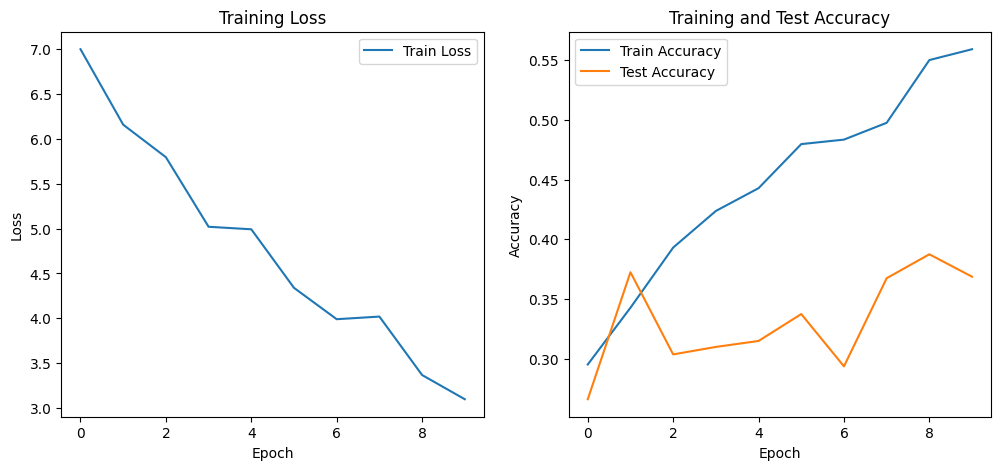

In [89]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss_list, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss')


plt.subplot(1, 2, 2)
plt.plot(train_accuracy_list, label='Train Accuracy')
plt.plot(test_accuracy_list, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Test Accuracy')


plt.show()

In [90]:
train_accuracy_list[-1], test_accuracy_list[-1]


(0.5590625, 0.36875)

In [91]:
sum(p.numel() for p in model.parameters())


1080004

<p class="task" id="3"></p>

3\. Напишите функцию, которая выбирает несколько изображений из переданного набора данных и выводит их на экран в виде сетки с указанием над ними названия правильного класса и класса, предсказанного моделью. Воспользовавшись данной функцией, выведите прогнозы итоговой модели из предыдущей задачи по 6 случайным картинкам.

```
def show_examples(model, dataset, k=6):
    pass
```

- [ ] Проверено на семинаре

In [139]:
import matplotlib.pyplot as plt
import numpy as np

def show_examples(model, dataset, k=6):

    random_indices = np.random.choice(len(dataset), k, replace=False)


    fig, axes = plt.subplots(2, 3, figsize=(12, 8))
    axes = axes.ravel()

    for i, index in enumerate(random_indices):
        image, label = dataset[index]


        with torch.no_grad():
            output = model(image.view(1, -1).to(device))
            predicted_class = torch.argmax(output, 1).item()


        axes[i].imshow(image.permute(1, 2, 0).numpy())
        axes[i].set_title(f'Actual: {dataset.classes[label]}\nPredicted: {dataset.classes[predicted_class]}')
        axes[i].axis('off')

    plt.show()




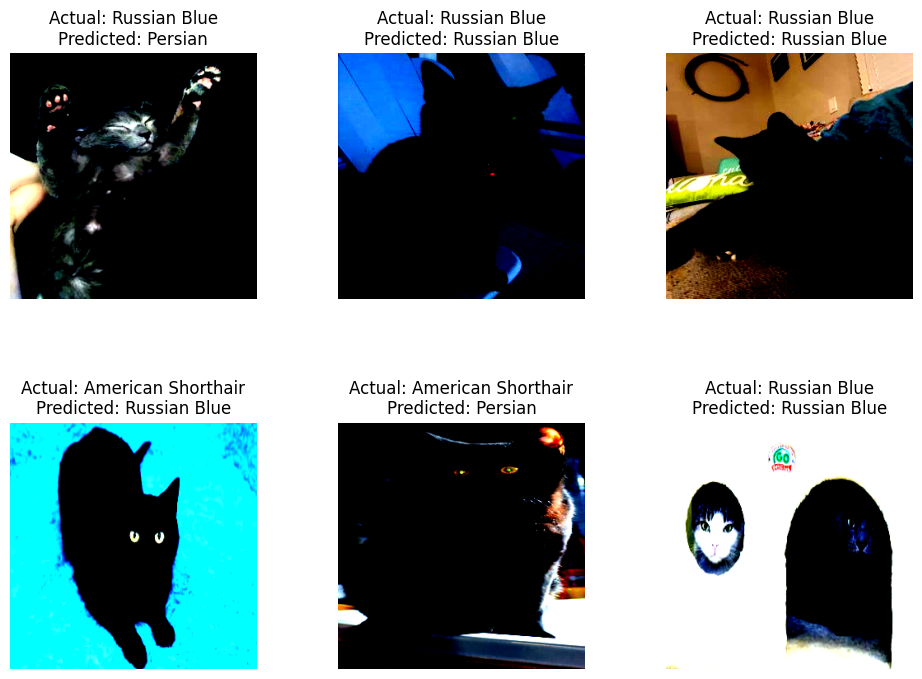

In [95]:
show_examples(model, dataset, k=6)

<p class="task" id="4"></p>

4\. Решите задачу классификации на основе датасета из первого задания, используя сверточные слои. Постройте график изменения значения функции потерь на обучающем множестве в зависимости от номера эпохи, графики изменения метрики accuracy на обучающем и тестовом множестве в зависимости от эпохи. Выведите на экран итоговое значение метрики accuracy на обучающем и тестовом множестве. Выведите на экран количество параметров модели. Воспользовавшись функцией из предыдущего задания, выведите прогнозы итоговой модели по 6 случайным картинкам.

- [ ] Проверено на семинаре

In [129]:
class ConvNet(nn.Module):
    def __init__(self, num_classes):
        super(ConvNet, self).__init__()

        self.conv1 = nn.Conv2d(3, 16, kernel_size=3)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2)
        self.fc = nn.Linear(16 * 149 * 149, num_classes)


    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x


In [130]:
input_size = 300 * 300 * 3
num_classes = len(dataset.classes)
learning_rate = 0.001
num_epochs = 10


model = ConvNet(num_classes)


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)



In [131]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


ConvNet(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (relu): ReLU()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc): Linear(in_features=355216, out_features=4, bias=True)
)

In [132]:
train_loss_list = []
train_accuracy_list = []
test_accuracy_list = []

In [133]:
for epoch in range(num_epochs):
    model.train()
    running_loss = 0
    total_correct = 0
    total_samples = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)


        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_correct += (predicted == labels).sum().item()
        total_samples += labels.size(0)

    train_accuracy = total_correct / total_samples
    train_accuracy_list.append(train_accuracy)
    train_loss_list.append(running_loss / len(train_loader))


    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_accuracy = correct / total
    test_accuracy_list.append(test_accuracy)

    print(f'Epoch {epoch+1}, Loss: {train_loss_list[-1]:.4f}, Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}')


Epoch 1, Loss: 9.8716, Train Accuracy: 0.3494, Test Accuracy: 0.4625
Epoch 2, Loss: 1.3030, Train Accuracy: 0.5509, Test Accuracy: 0.4238
Epoch 3, Loss: 0.7474, Train Accuracy: 0.7128, Test Accuracy: 0.4675
Epoch 4, Loss: 0.4433, Train Accuracy: 0.8475, Test Accuracy: 0.4788
Epoch 5, Loss: 0.2056, Train Accuracy: 0.9584, Test Accuracy: 0.4537
Epoch 6, Loss: 0.1427, Train Accuracy: 0.9788, Test Accuracy: 0.5162
Epoch 7, Loss: 0.0826, Train Accuracy: 0.9944, Test Accuracy: 0.5088
Epoch 8, Loss: 0.0599, Train Accuracy: 0.9972, Test Accuracy: 0.5075
Epoch 9, Loss: 0.0390, Train Accuracy: 0.9988, Test Accuracy: 0.5050
Epoch 10, Loss: 0.0292, Train Accuracy: 1.0000, Test Accuracy: 0.5288


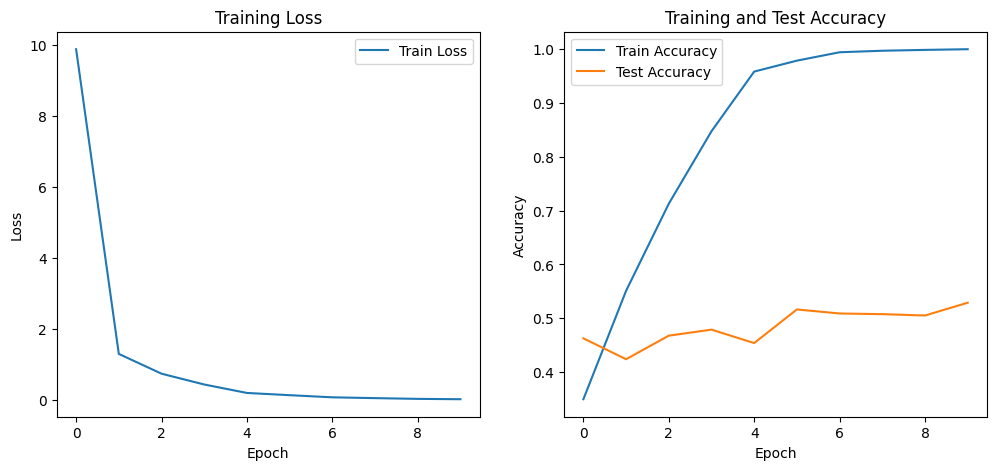

In [135]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss_list, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss')

plt.subplot(1, 2, 2)
plt.plot(train_accuracy_list, label='Train Accuracy')
plt.plot(test_accuracy_list, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Test Accuracy')

plt.show()

In [136]:
train_accuracy_list[-1], test_accuracy_list[-1]


(1.0, 0.52875)

In [137]:
sum(p.numel() for p in model.parameters())


1421316

In [143]:
def show_examples(model, dataset, k=6):

    random_indices = np.random.choice(len(dataset), k, replace=False)
    fig, axes = plt.subplots(2, 3, figsize=(12, 8))
    axes = axes.ravel()

    for i, index in enumerate(random_indices):
        image, label = dataset[index]

        with torch.no_grad():
            output = model(image.view(1, 3, 300, 300).to(device))

            predicted_class = torch.argmax(output, 1).item()

        axes[i].imshow(image.permute(1, 2, 0).numpy())
        axes[i].set_title(f'Actual: {dataset.classes[label]}\nPredicted: {dataset.classes[predicted_class]}')
        axes[i].axis('off')

    plt.show()




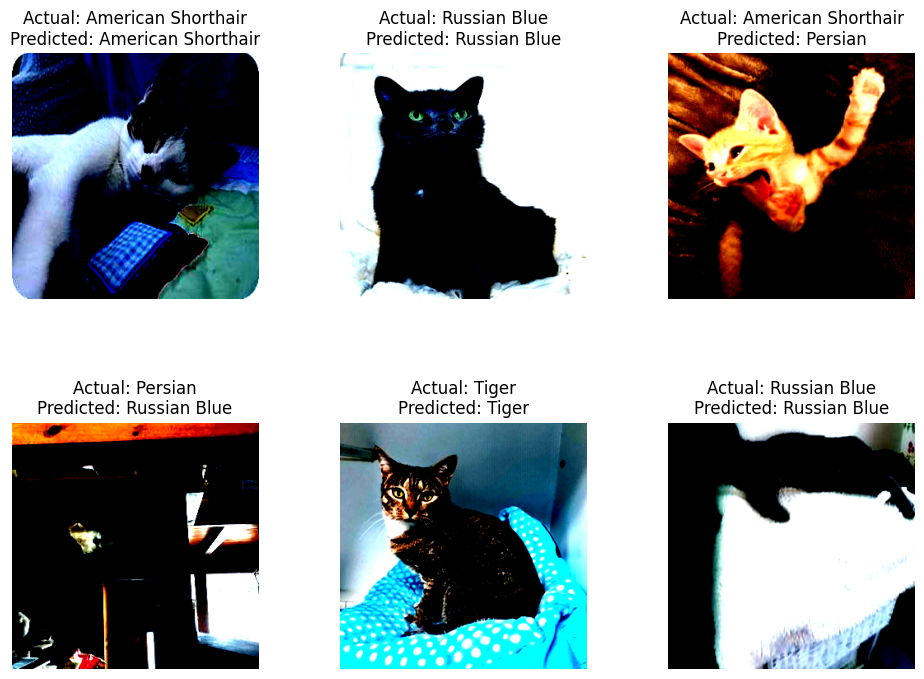

In [144]:
show_examples(model, dataset, k=6)

<p class="task" id="5"></p>

5\. Проанализируйте обученную в предыдущей задаче модель, исследовав обученные ядра сверточных слоев. Выберите одно изображение из тестового набора данных и пропустите через первый сверточный слой модели. Визуализируйте полученные карты признаков.

- [ ] Проверено на семинаре

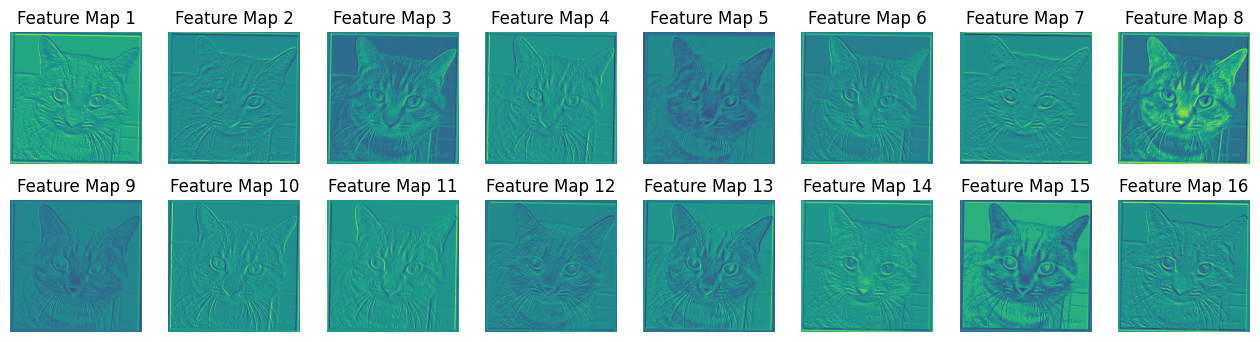

In [154]:
test_image, test_label = next(iter(test_loader))
test_image = test_image.to(device)

conv1_features = model.conv1(test_image)

conv1_features = conv1_features.cpu().detach().numpy()


plt.figure(figsize=(16, 4))
for i in range(16):
    plt.subplot(2, 8, i+1)
    plt.imshow(conv1_features[0, i, :, :])
    plt.axis('off')
    plt.title(f'Feature Map {i + 1}')

plt.show()


## Обратная связь
- [ ] Хочу получить обратную связь по решению